# Metode Bisection 

Algoritma bisection
1. Tebak batas kiri dan batas kanan (a dan b)
2. Pastikan a dan b ada di dua sisi yang berbeda dari akar
3. kalau a dan b ada di sisi yang sama, maka program berhenti
4. jika a dan b ada di dua sisi yang berbeda, lanjutkan programnya
5. cari nilai tengah antara a dan b, 
$$ m = \frac{(a+b)}{2} $$
6. cek nilai m, jika m ada di sebelah kanan maka ganti batas kanannya (b) menjadi m
7. cek nilai m, jika m ada di sebelah kiri maka ganti batas kirinnya (a) menjadi m
8. Lanjutkan terus menerus sampai nilai f(x) lebih kecil dari nilai toleransi

In [16]:
import numpy as np
awal = 0
akhir = 5
err_ = 1e-1
y = lambda x: x*x - (5*x) + 6

def bisection(y, a, b, e):
    m = (a+b)/2
    while abs(y(m)) > e:
        if y(a)*y(m)<=e:
            print("Nilai akar a:", m)
            return bisection(y, a, m, err_)
        elif y(b)*y(m)<=e:
            print("Nilai akar b:", m)
            return bisection(y, m, b, err_)
        else:
            print("Nilai akar : ", a, b)

bisection(y, awal, akhir, err_)

Nilai akar a: 2.5
Nilai akar b: 1.25
Nilai akar b: 1.875
Nilai akar a: 2.1875


# Metode Riemann Sums
<br> integral untuk menghitung luas di bawah grafik, pada metode Riemann sums seluruh daerah di bawah kurva akan di buat sebuah persegi panjang atau trapesium untuk mempermudah perhitungan luasnya.
<br> Algoritma
1. Tentukan nilai a (batas minimal) dan b (batas maksimal)
2. Hitung lebar persegi panjang (h), dengan n berupa jumlah persegi panjang
$$ h = \frac{b-a}{n-1} $$
3. Hitung luas persegi panjang
$$ luas = h  f(x) $$
4. Hitung seluruh jumlah luasnya

In [48]:
import math
f = lambda x: math.sin(x)

a = math.radians(0)
b = math.radians(90)
n = 100000

def integral(f,a,b,n):
    jumlah = []
    deltax = (b-a)/(n-1)
    for i in range(n):
        a = deltax+a
        j = deltax*f(a)
        jumlah.append(j)
    jumlah = sum(jumlah)
    return jumlah
integral(f,a,b,n)

1.000023562159832

In [49]:
listangka= [1,2,3,4,5,6,7,8,8,9]
#darimana, kemana, selang berapa
print(listangka[1:8:2])

[2, 4, 6, 8]


## Persamaan Diferensial
Untuk menghitung radioactive decay, dan jumlah perubahan fluks terhadap waktu
1. ordinary PD, bergantung pada 1 variabel bebas
2. parsial PD, ada 2 variabel bebas

# Metode Euler

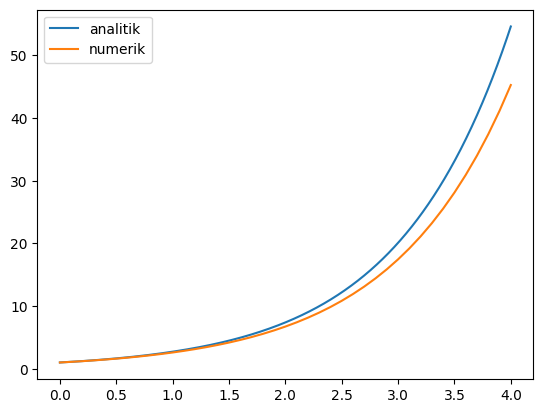

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Cara numerik
x = np.linspace(0, 10, 5)
list_u = []
N = 40 # semakin besar maka akan mendekati hasil analitik
x = 4
dx = x/N
x2 = np.zeros(N+1)
y2 = np.zeros(N+1)
x2[0] = 0
y2[0] = 1

for n in range(N):
    x2[n+1] = x2[n]+ dx
    y2[n+1] = y2[n] + (y2[n]*dx)

# Cara analitik
x = np.linspace(0, 4, 1000)
y = []
for i in range(len(x)):
    y.append(math.exp(x[i]))

plt.plot(x, y, label="analitik")
plt.plot(x2, y2, label="numerik")
plt.legend()
plt.show()

# Radioactive Decay

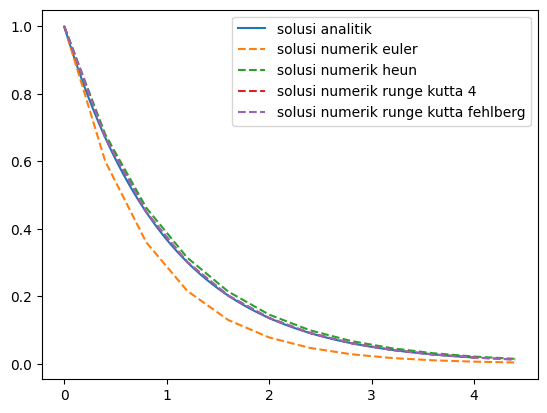

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Solusi analitik
g = 9.8
a = 0.01
x = np.linspace(0,4,1000)
y = []
for i in range (len(x)):
    y.append(math.exp(-x[i]))
plt.plot(x,y, label="solusi analitik")

# Solusi numerik
# Rumus fungsi
def f1(u,t):
    fungsi = -u
    return fungsi

# Metode Euler
def euler(f, u0, t0, tmax, dt):
    u = u0
    t = t0
    listu = [u0]
    listt = [t0]
    while t<tmax:
        u = u + dt * f(u,t)
        t = t + dt
        listu.append(u)
        listt.append(t)
    return(listu, listt)

def heun(f, u0, t0, tmax, dt):
    u = u0
    t = t0
    listu = [u0]
    listt = [t0]
    while t<tmax:
        ue = u + dt * f(u,t)
        u = u + dt/2 * (f(u,t)+f(ue, t+dt))
        t = t + dt
        listu.append(u)
        listt.append(t)
    return(listu, listt)

# Metode Runge Kutta 4
def rk4(f, u0, t0, tmax, dt):
    u = u0
    t = t0
    listu = [u0]
    listt = [t0]
    while t < tmax:
        k1 = dt * f(u,t)
        k2 = dt * f(u+k1/2, t+dt/2)
        k3 = dt * f(u+k2/2, t+dt/2)
        k4 = dt * f(u+k3, t+dt)
        k = k1/6 + k2/3 + k3/3 + k4/6
        u = u + k
        t = t + dt
        listu.append(u)
        listt.append(t)
    return(listu, listt)

# Metode Runge Kutta Fehlberg
def rkf(f, u0, t0, tmax, dt):
    u = u0
    t = t0
    listu = [u0]
    listt = [t0]
    while t <tmax:
        k1 = dt * f(u,t)
        k2 = dt * f(u+k1/4, t+dt/4)
        k3 = dt * f(u+(3/32*k1)+(9/32*k2),t+dt*(3/8))
        k4 = dt * f(u+(1932/2197*k1)+(-7200/2197*k2)+(7296/2197*k3),t+dt*(12/13))
        k5 = dt * f(u+(439/216*k1)+(-8*k2)+(3680/513*k3)+(-845/4104*k4),t+dt)
        k6 = dt * f(u+(-8/27*k1)+(2*k2)+(-3544/2565*k3)+(1859/4104*k4)+(-11/40*k5),t+dt/2)
        k = (k1*16)/135 + 0*k2 + (k3*6656)/12825 + (k4*28561)/56430 + (k5*-9)/50 + (k6*2)/55
        u = u+k
        t = t+dt
        listu.append(u)
        listt.append(t)
    return(listu, listt)


listu, listt = euler(f1, 1, 0, 4, 0.4)
listu1, listt1 = heun(f1, 1, 0, 4, 0.4)
listu2, listt2 = rk4(f1, 1, 0, 4, 0.4)
listu3, listt3 = rkf(f1, 1, 0, 4, 0.4)
plt.plot(listt, listu,'--', label="solusi numerik euler")
plt.plot(listt1, listu1, '--', label="solusi numerik heun")
plt.plot(listt2, listu2, '--', label="solusi numerik runge kutta 4")
plt.plot(listt3, listu3, '--', label="solusi numerik runge kutta fehlberg")
plt.legend()
plt.show()

# Gerak Parabola

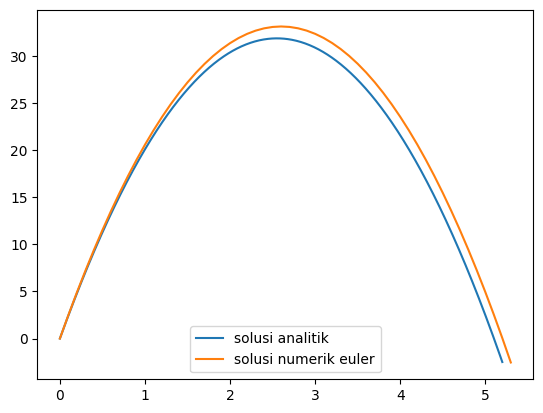

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Solusi analitik
g = 9.8
x = np.linspace(0, 5.2, 1000)
y = []
for i in range(len(x)):
    y.append(25*x[i]-g/2*x[i]**2)
plt.plot(x,y, label = "solusi analitik")

# Solusi numerik
def euler2(f,u0,v0,t0,tmax, dt):
    u = u0
    v = v0
    t = t0
    listu = [u0]
    listv = [v0]
    listt = [t0]
    while t<tmax:
        u = u + dt * v
        v = v + dt * f(u,v,t)
        t = t + dt
        listu.append(u)
        listv.append(v)
        listt.append(t)
    return(listu, listv, listt)

def f1(u,v,t):
    fungsi = -g
    return fungsi

listu, listv, listt = euler2(f1, 0, 25, 0, 5.2, 0.1)
plt.plot(listt, listu, label = "solusi numerik euler")
plt.legend()
plt.show()